(60000, 28, 28) (60000,)
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_54 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_125 (Dense)            (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7734 - accuracy: 0.7504
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4199 - accuracy: 0.8498
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3733 - accuracy: 0.8651
Epoch 4/5
1500/1500 [==============================

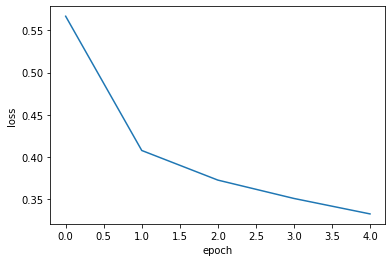

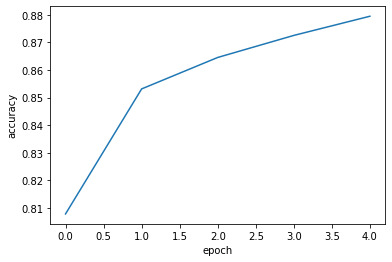

dict_keys(['loss', 'accuracy'])


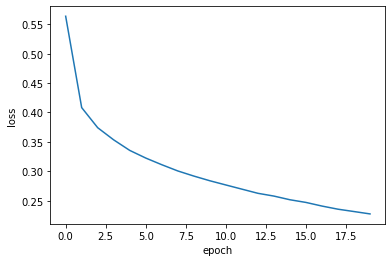

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


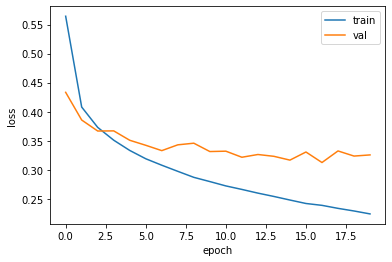

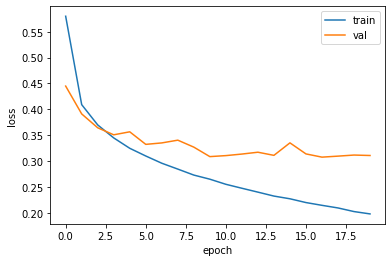

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_58 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 100)               78500     
_________________________________________________________________
dropout_26 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


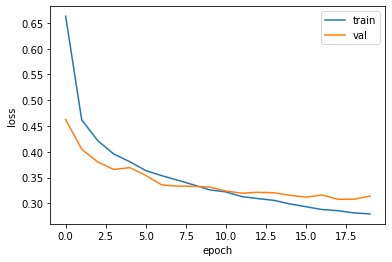

-rw-r--r-- 1 root root 981792 Apr 15 00:55 best-model.h5
-rw-r--r-- 1 root root 332480 Apr 15 01:17 model-weights.h5
-rw-r--r-- 1 root root 981792 Apr 15 01:17 model-whole.h5
375/375 [==============================] - 1s 1ms/step - loss: 0.3264 - accuracy: 0.8816
15


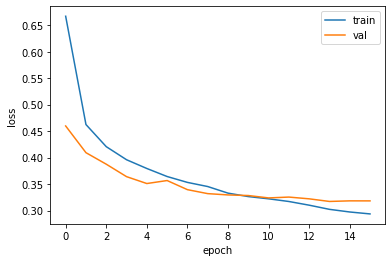

375/375 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8839


[0.3171367049217224, 0.8839166760444641]

In [14]:
#패션 MNIST : 10개 클래스, 28*28 흑백, 60000개
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) =\
 keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)

train_scaled = train_input / 255.0

train_scaled = train_scaled.reshape(-1, 28*28)

#keras model create
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='sigmoid'))

  if a_layer:
    model.add(a_layer)

  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model = model_fn()
model.summary()


#모델설정
#이진분류:loss='binary_crossentroy'
#다중분류:loss='categorical_crossentropy'
#다중분류이고, target 값이 정수일때는 loss='sparse_categorical_crossentropy'
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5) # 훈련
print(history.history.keys())

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 훈련
print(history.history.keys())

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target)) # 훈련
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target)) # 훈련

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


#신경망에 있는 규제 방법
#drop out
# 은닉층에 있는 뉴런의 출력을 랜덤하게 계산을 하지 않게 해서 과대적합을 막는 기법입니다.
# dropout은 훈련중에 적용되며, 평가나 예측에서는 적용하지 않습니다. tensorflow는 이를 자동으로 처리

model = model_fn(keras.layers.Dropout(0.3))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target)) # 훈련
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


#모델 저장과 복원
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target)) # 훈련

model.save_weights('model-weights.h5')
model.save('model-whole.h5')

!ls -al *.h5

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

def accurcy_fn(model, x, y):
  labels = np.argmax(model.predict(x), axis=-1) #각배열의 max value에 대한 index 반환
  return np.mean(labels==y)

accurcy_fn(model, val_scaled, val_target)

model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)




#early stopping
# 검증 점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법입니다.
# 이렇게 하면 계산 비용과 시간을 절약할 수 있습니다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi=300)
plt.show()

model.evaluate(val_scaled, val_target)